# Afinación de los parámetros de modelos

* *30 min* | Ultima modificación: Junio 22, 2019

En muchos casos, los modelos contienen diferentes hiperparámetros que controlan su configuración y la estimación de los parámetros. Por ejemplo, en el ejemplo del ajuste del polinomio, el grado $n$ es un hiperparámetro. En este tutorial, se presenta como abordar el problema cuando hay más de un hiperparámetro que debe ser ajustado.

## Ejemplo en Python

In [18]:
##
## Preparación
##
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt 
%matplotlib inline

### Descripción del problema

Se tiene un conjunto de imágenes de 8x8 de dígitos escritos a mano (datos de entrada) y el dígito al que corresponde la imágen. Se desea construir un clasificador que indique a que dígito corresponde una determinada imágen.

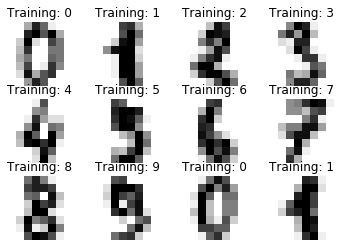

In [19]:
##
## carga el dataset
##
digits = datasets.load_digits()

##
## A continuación se grafican algunas imágenes y los dígitos
## a los que corresponden.
##
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [20]:
##
## Separa los datos. X son los pixels de las 
## imágenes; y es el dígito.
## 
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

##
## Parte los datos en dos conjutos iguales
##
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5, 
    random_state=0)

##
## Aca se usara una SVM. Dependiendo del tipo de kernel
## cambian los parámetros que pueden ajustarse.
##
## La variable tuned_parameters es una lista de diccionarios
## que contiene los valores que pueden ajustarse
##
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4], 
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 
                     'C': [1, 10, 100, 1000]}]

##
## Se definen las métricas de precisión que se usarán.
##
scores = ['precision', 'recall']

for score in scores:

    ##
    ## Construye los clasificadores. SVC es una 
    ## máquina de vectors de soporte para clasificación.
    ## Hay un clasificador por cada conjunto de parámetros
    ##
    clf = GridSearchCV(SVC(), 
                       tuned_parameters, 
                       cv=5,                       ## crossvalidation      
                       scoring='%s_macro' % score)
    
    ##
    ## entrenamiento de los clasificadores
    ##
    clf.fit(X_train, y_train)

    ##
    ## La variable clf.best_params_ contiene los mejores parámetros
    ## La variable clf.cv_results_ almacena los resultados de la corrida
    ##
    stds = clf.cv_results_['std_test_score']
    
    ##
    ## valores real y pronosticado
    y_true, y_pred = y_test, clf.predict(X_test)
    print(' ')
    print(classification_report(y_true, y_pred))

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1

## Ejemplo en R


In [16]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Se procede a computar el modelo óptimo para el problema del riesgo de crédito.

In [24]:
%%R
##
## Se obtienen los parámetros ajustables del modelo
## considerado
##
library(caret)
modelLookup("rpart")

  model parameter                label forReg forClass probModel
1 rpart        cp Complexity Parameter   TRUE     TRUE      TRUE


In [23]:
%%R

library(C50)

##
## Lectura de los datos
##
data <- read.csv("credit.csv")
data$default <- factor(data$default, labels=c("No", "Yes"))



##
## La función `train` permite construir muchos modelos
## que difieren en el conjunto de parámetros ajustables
## requeridos para su estimación. Se usan los valores
## por defecto que tiene `train`.
## Note que este paso requiere mucho tiempo de cómputo.
##




set.seed(300)
m <- train(default ~ ., data = data, method = "C5.0")
m

R[write to console]: Error in library(C50) : there is no package called ‘C50’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(C50) : there is no package called ‘C50’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


Note que en la tabla anterior, el valor del estadístico de ajuste para cada corrida es obtenido sobre 25 réplicas bootstrap para cada conjunto posible de parámetros. Los valores posibles que puede tomar cada parámetro son:


* `model` = {rules, tree}


* `winnow` = {TRUE, FALSE}


* `trials` = {1, 10, 20}

Entonces, 2 x 2 x 3 = 12.

Este proceso es equivalente a realizar un diseño de experimentos para obtener la mejor combinación de parámetros.

In [11]:
%%R
##
## Después de identificar el mejor modelo, `train()` 
## usa el mejor conjunto de parámetros para construir 
## un modelo estimado sobre todo el conjunto de datos.
##
## Mejor modelo:
##
m$finalModel


Call:
(function (x, y, trials = 1, rules = FALSE, weights = NULL, control
 "winnow", "noGlobalPruning", "CF", "minCases", "fuzzyThreshold",
 "sample", "earlyStopping", "label", "seed")))

Classification Tree
Number of samples: 1000 
Number of predictors: 48 

Number of boosting iterations: 20 
Average tree size: 45.1 

Non-standard options: attempt to group attributes, winnowing


In [13]:
%%R
##
## Pronóstico
##
p <- predict(m, data)
table(p, data$default)

     
p      No Yes
  No  676  79
  Yes  24 221

In [14]:
%%R
##
## Probabilidades del pronóstico para la muestra de entrenamiento
##
head(predict(m, data, type = "prob"))

No,Yes
0.8720819,0.12791809
0.3284062,0.67159380
1.0000000,0.00000000
0.7563177,0.24368229
0.4531721,0.54682785
0.9085110,0.09148904


In [15]:
%%R
##
## A continuación se ejemplifica como parametrizar
## la búsqueda realizada por train.
##
ctrl <- trainControl(method = "cv",               # cross validation
                     number = 10,                 # número de grupos
                     selectionFunction = "oneSE") # 

In [16]:
%%R
##
## Se crea una malla de valores posibles
## para los parámetros a optimizar
##
grid <- expand.grid(.model = "tree",
                    .trials = c(1, 5, 10, 15, 20, 25, 30, 35),
                    .winnow = "FALSE")
grid

.model,.trials,.winnow
tree,1,FALSE
tree,5,FALSE
tree,10,FALSE
tree,15,FALSE
tree,20,FALSE
tree,25,FALSE
tree,30,FALSE
tree,35,FALSE


In [18]:
%%R
##
## Se llama a train() con los valores 
## suministrados para la búsqueda.
##
set.seed(300)
m <- train(default ~ .,         # todas las variables
           data      = data,    # dataset
           method    = "C5.0",  #
           metric    = "Kappa", #
           trControl = ctrl,    #
           tuneGrid  = grid)    #
m

Warning message in Ops.factor(x$winnow):
“‘!’ not meaningful for factors”

C5.0 

1000 samples
  20 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 900, 900, 900, 900, 900, 900, ... 
Resampling results across tuning parameters:

  trials  Accuracy  Kappa    
   1      0.714     0.2918834
   5      0.735     0.3401066
  10      0.747     0.3504832
  15      0.749     0.3642719
  20      0.755     0.3641425
  25      0.749     0.3521465
  30      0.744     0.3445306
  35      0.745     0.3517542

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
Kappa was used to select the optimal model using  the one SE rule.
The final values used for the model were trials = 5, model = tree and winnow
 = FALSE.